In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset/spam.csv', encoding='latin1')
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3493,spam,You are being contacted by our dating service ...,NaN,NaN,NaN
4549,ham,\Hey! do u fancy meetin me at 4 at cha åÐ hav ...,NaN,NaN,NaN
923,ham,She went to attend another two rounds today..b...,NaN,NaN,NaN
218,ham,I have to take exam with march 3,NaN,NaN,NaN
408,ham,Headin towards busetop,NaN,NaN,NaN


In [9]:
data.shape

(5572, 5)

In [10]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Model Evaluation
# 6. Improvement
# 7. Website
# 8. Model Deployment

## Data Cleaning

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [15]:
data.sample(5)

,v1,v2
4253,ham,"How about clothes, jewelry, and trips?"
4983,spam,goldviking (29/M) is inviting you to be his fr...
2641,spam,"You are guaranteed the latest Nokia Phone, a 4..."
3573,ham,Yeah sure I'll leave in a min
4693,ham,Pls give her the food preferably pap very slow...


In [18]:
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)
data.sample(5)

,target,text
37,ham,I see the letter B on my car
3222,ham,Well that must be a pain to catch
3059,ham,K..k...from tomorrow onwards started ah?
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!
20,ham,Is that seriously how you spell his name?


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
data['target']=encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
data.duplicated().sum()

np.int64(403)

In [ ]:
data=data.drop_duplicates(keep='first')

In [27]:
data.duplicated().sum()

np.int64(0)

## EDA

In [28]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

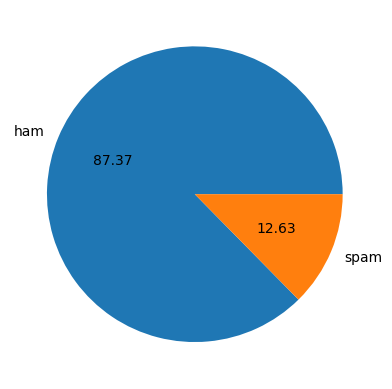

In [29]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [30]:
# Data is imbalance

In [31]:
!pip install nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.3 MB/s eta 0:00:00
Using cached click-8.2.1-py3-none-any.whl (102 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ ---

In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
data['num_characters'] = data['text'].apply(len)
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
print(data['text'].apply(type).value_counts())
print(data['text'].isnull().sum())


text
<class 'str'>    5170
Name: count, dtype: int64
0


In [58]:
data['text'] = data['text'].fillna('')



In [59]:
print(data['text'].apply(type).value_counts())
print(data['text'].isnull().sum())

text
<class 'str'>    5170
Name: count, dtype: int64
0


In [108]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
# Solution 1: Download required NLTK data
import nltk
import ssl

# Handle SSL certificate issues (if any)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download the required tokenizer data
nltk.download('punkt')
nltk.download('punkt_tab')  # For newer versions of NLTK

# Now your original code should work
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Alternative Solution 2: Use a different tokenization method
# If you continue having issues, you can use a simple split-based approach:
data['num_words'] = data['text'].apply(lambda x: len(x.split()))

# Alternative Solution 3: More robust word counting with regex
import re
data['num_words'] = data['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

# Alternative Solution 4: Using spaCy (if installed)
# import spacy
# nlp = spacy.load("en_core_web_sm")
# data['num_words'] = data['text'].apply(lambda x: len(nlp(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [111]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [112]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
data['num_sentances']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
data[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5170.000000,5170.000000,5170.000000
mean,78.962669,18.452224,1.965184
std,58.241018,13.325941,1.448659
min,0.000000,0.000000,0.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham massages
data[data['target']==0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4517.000000,4517.000000,4517.000000
mean,70.443657,17.119991,1.819792
std,56.361718,13.494881,1.383769
min,0.000000,0.000000,0.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
# spam massages
data[data['target']==1][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [120]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

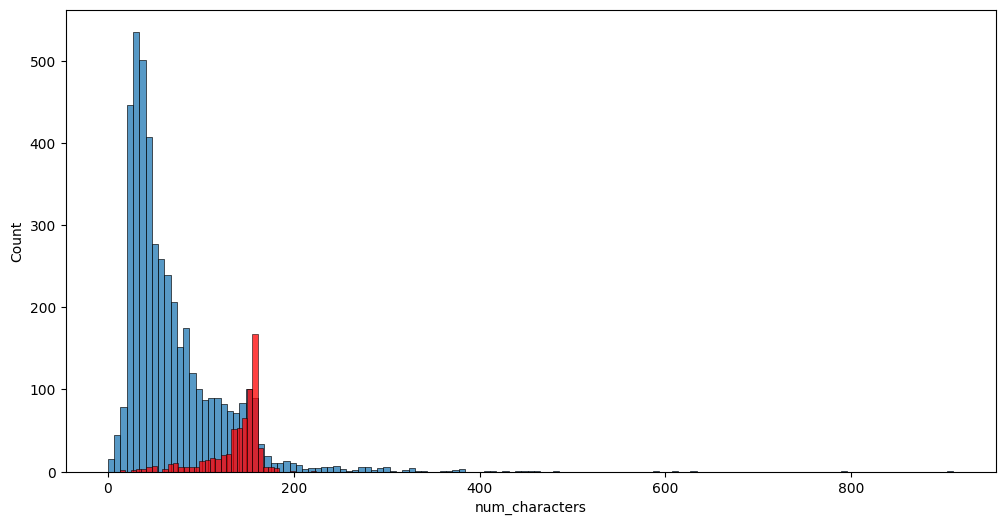

In [125]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

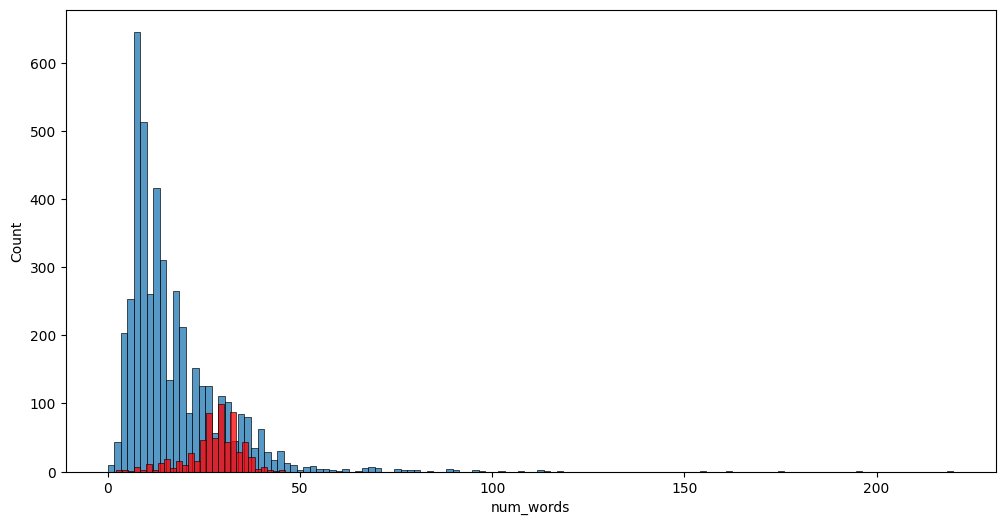

In [126]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentances', ylabel='Count'>

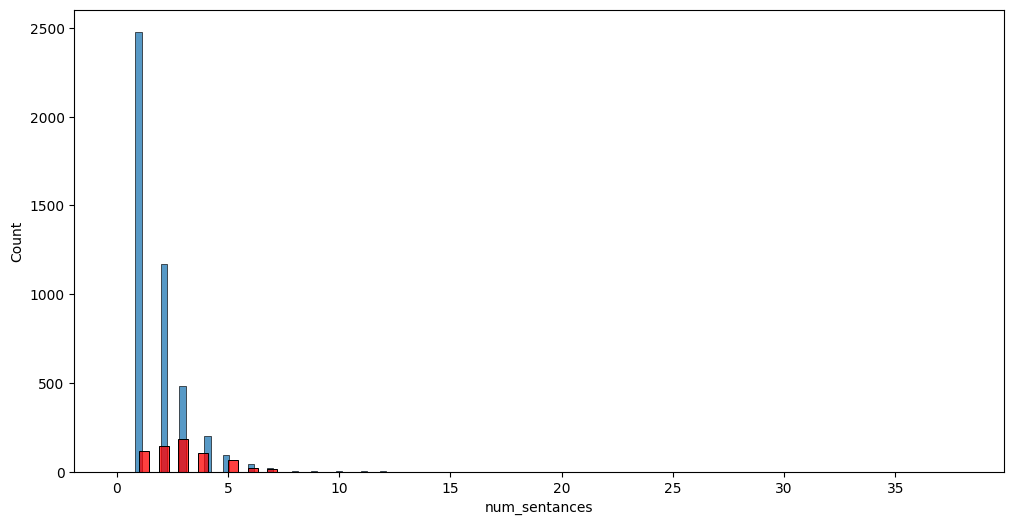

In [127]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_sentances'])
sns.histplot(data[data['target']==1]['num_sentances'],color='red')

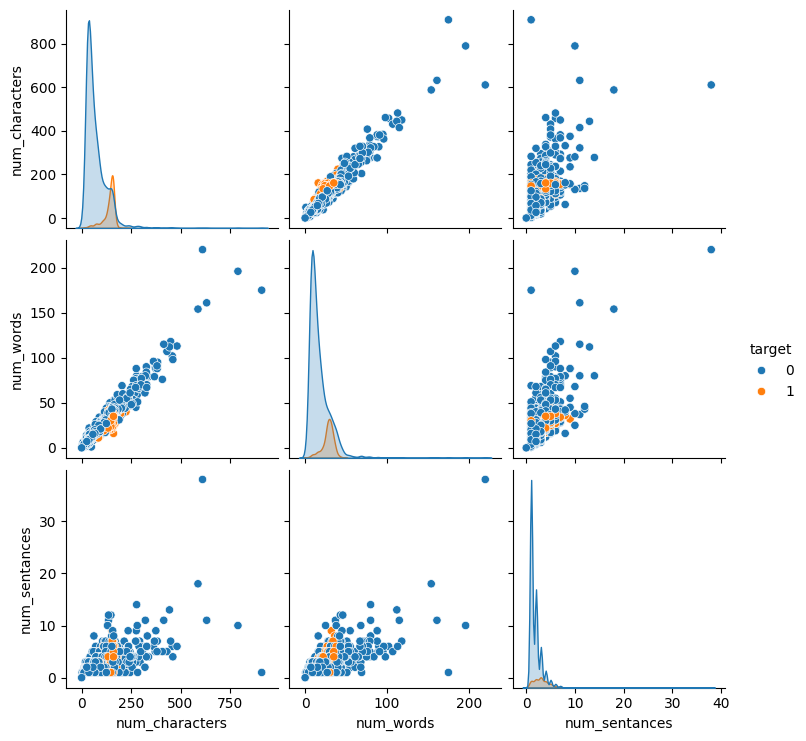

In [128]:
sns.pairplot(data,hue='target')

<Axes: >

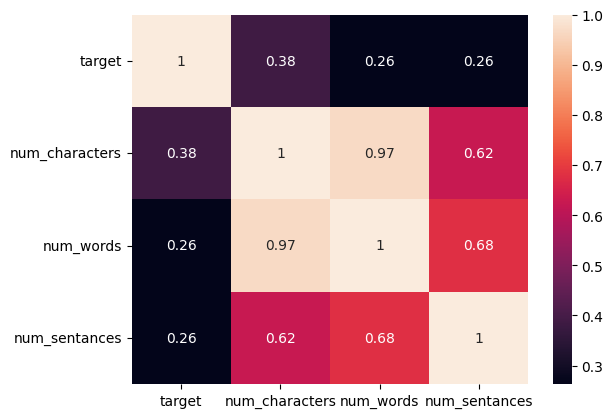

In [130]:
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True)



## 3. Data Preprocessing
#### -Lower case
#### -Tokenization
#### -Removing special characters
#### -Removing stop words and punctuation
#### -Stemming(dance,dancing is taken as same word)

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [196]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for word in text:
        if word.isalnum():
            y.append(word)

    text =y[:] # this line means copy of y is send to text
    y.clear()     
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) #It joins all the words in the list y into a single string, with spaces between the words.



In [195]:
sent="Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
transform_text(sent)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [182]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [191]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [199]:
data['transformed_text']=data['text'].apply(transform_text)
data.head()

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [204]:
# Wordcloud

from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

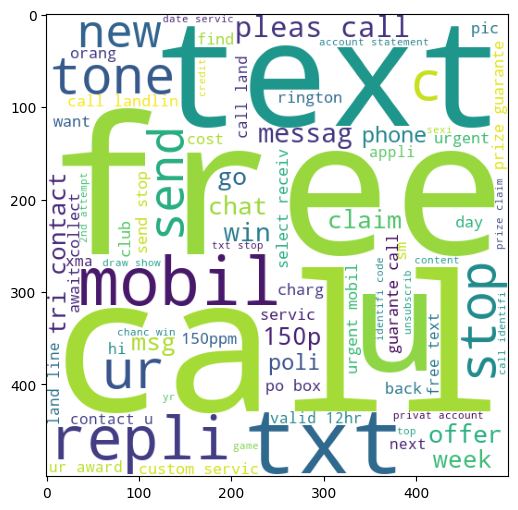

In [206]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

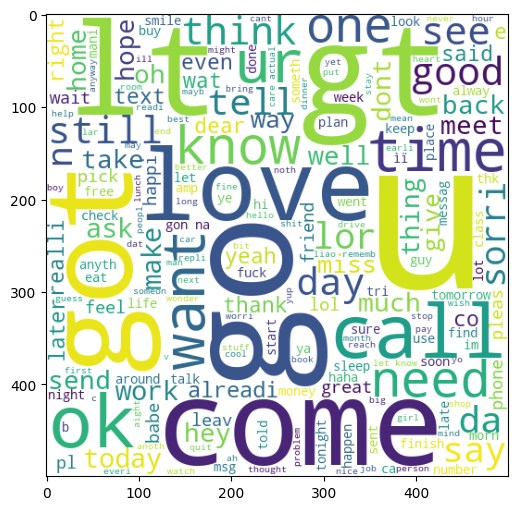

In [207]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [208]:
data.head()

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [219]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)   

In [218]:
len(spam_corpus)

9939

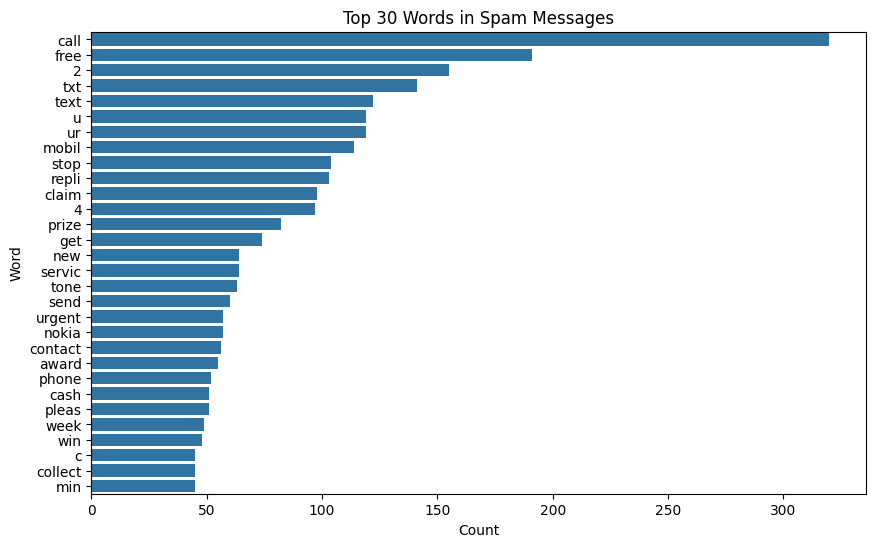

In [230]:
from collections import Counter
# Create dataframe of top 30 words
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words)
plt.title("Top 30 Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

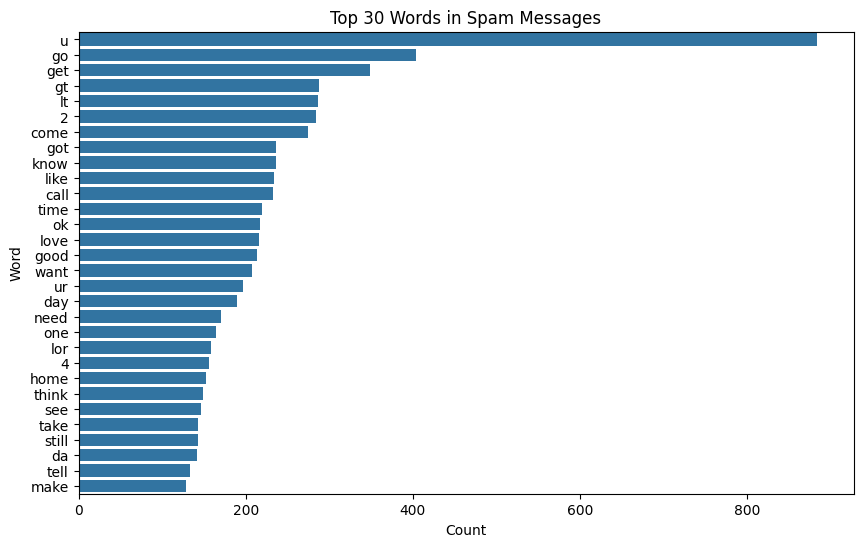

In [233]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)   
        
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words)
plt.title("Top 30 Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

## 4. Model Building

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [235]:
X=cv.fit_transform(data['transformed_text']).toarray()

In [252]:
X.shape

(5170, 6708)

In [253]:
y=data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5170,))

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [255]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [256]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [247]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8655705996131529
[[778 122]
 [ 17 117]]
0.4895397489539749


In [248]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9671179883945842
[[880  20]
 [ 14 120]]
0.8571428571428571


In [249]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[899   1]
 [ 28 106]]
0.9906542056074766


In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
X=tfid.fit_transform(data['transformed_text']).toarray()

In [257]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[778 122]
 [ 22 112]]
0.47863247863247865


In [258]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[900   0]
 [ 46  88]]
1.0


In [259]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[899   1]
 [ 28 106]]
0.9906542056074766


In [260]:
# tfidf-> mnb bnb

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [262]:
svc=SVC()
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()